# Invariant Mass Prediction Using ML
## Bryan Dinh
### Comp_Phys Final Project 2023

Model Goal: Predict the invariant mass of a particle decay process which results in the creation of two muons. 

In [6]:
import os
import pandas as pd
import tensorflow as tf
#from tensorflow import keras
import numpy as np

# Load and Prepare Data
Load the training and testing datasets to train our model. From there format the .csv files into a pandas dataframe which will be used throughout the notebook. We'll need to define the data parameters as well as the target parameters. In this case, we will be looking for the pair mass of a particle before it decays into two muons. The data parameters consist of position and momentum data, among others, of the decay products.

In [7]:
#os.chdir(os.path.dirname(BD_ML_Training.ipynb))
#os.chdir('../') # Get out of current folder

#os.chdir(os.path.abspath("C:\\Users\\Bryan\\PycharmProjects\\comp_phys_2023\\Data")) # Don't hardcode
os.chdir(os.path.abspath("/Users/bryandinh/PycharmProjects/comp_phys_2023/Data")) # Dont hardcode
#/Users/bryandinh/PycharmProjects/comp_phys_2023/Data/trainDataset2.csv
cwd=os.getcwd()
print(cwd)
train2=pd.read_csv(cwd+"/trainDataset2.csv",index_col=0)
test=pd.read_csv(cwd+"/FinalDataset.csv",index_col=0)
train2.head()

/Users/bryandinh/PycharmProjects/comp_phys_2023/Data


,Pair Mass,Muon 1 Energy,Muon 2 Energy,Muon 1 pT,Muon 2 pT,Muon 1 Eta,Muon 2 Eta,Muon 1 Phi,Muon 2 Phi,Muon 1 Rapidity,Muon 2 Rapidity
25000,4.19125,5.06381,7.09718,4.57564,3.71216,0.457408,1.264380,3.039380,2.447480,0.457294,1.264040
25001,8.59466,5.27870,7.09718,4.45581,3.71216,0.598385,1.264380,-0.631795,2.447480,0.598235,1.264040
25002,22.63070,8.01042,27.69420,7.59714,5.36723,-0.328096,2.324520,-2.621600,-0.978774,-0.328065,2.324330
25003,12.34510,8.01042,5.55988,7.59714,5.32962,-0.328096,-0.292268,-2.621600,0.039000,-0.328065,-0.292212
25004,9.41510,8.01042,3.98217,7.59714,3.74132,-0.328096,-0.355897,-2.621600,1.475980,-0.328065,-0.355761


Normalizing the data

In [8]:
# Separate Target and Predictor Variables
TargetVariable=['Pair Mass']
Predictors=['Pair Mass','Muon 1 Energy','Muon 2 Energy',
            'Muon 1 pT','Muon 2 pT','Muon 1 Eta','Muon 2 Eta','Muon 1 Phi','Muon 2 Phi','Muon 1 Rapidity','Muon 2 Rapidity']

X=train2[Predictors].values
Y=train2[TargetVariable].values

X_test=test[Predictors].values
Y_test=test[TargetVariable].values
### Standardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(Y)


# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
Y=TargetVarScalerFit.transform(Y)
X_test=PredictorScalerFit.transform(X_test)
Y_test=TargetVarScalerFit.transform(Y_test)

# Training a Model and Fine-Tuning Hyperparameters
With the data now set to go, we can begin training the model. This requires selecting a batch size and an epoch number.
+ Batch Size: Number of samples processed before model is updated
+ Epoch Number: Number of times the dataset is looked over during training

Adjusting these parameters is important to prevent over and under fitting which will affect prediction accuracy.


In [9]:
from keras.models import Sequential
from keras.layers import Dense

# Create ANN Model
model=Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=11, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
          
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(X, Y ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
1250/1250 [==============================] - 0s 280us/step - loss: 0.3662
Epoch 2/50
1250/1250 [==============================] - 0s 274us/step - loss: 0.1333
Epoch 3/50
1250/1250 [==============================] - 0s 272us/step - loss: 0.0882
Epoch 4/50
1250/1250 [==============================] - 0s 363us/step - loss: 0.0632
Epoch 5/50
1250/1250 [==============================] - 0s 269us/step - loss: 0.0485
Epoch 6/50
1250/1250 [==============================] - 0s 269us/step - loss: 0.0387
Epoch 7/50
1250/1250 [==============================] - 0s 270us/step - loss: 0.0318
Epoch 8/50
1250/1250 [==============================] - 0s 277us/step - loss: 0.0268
Epoch 9/50
1250/1250 [==============================] - 0s 272us/step - loss: 0.0235
Epoch 10/50
1250/1250 [==============================] - 0s 272us/step - loss: 0.0196
Epoch 11/50
1250/1250 [==============================] - 0s 292us/step - loss: 0.0170
Epoch 12/50
1250/1250 [==============================] - 0s 277

In [10]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyperparameters to try
    batch_size_list = [1, 10, 20]
    epoch_list = [10, 20, 40]
    
    import pandas as pd
    SearchResultsDataList = []  # List to store data frames
    
    # Initializing the trials
    TrialNumber = 0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber += 1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train, batch_size=batch_size_trial, epochs=epochs_trial, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test - model.predict(X_test)) / y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:', 'batch_size:', batch_size_trial, '-', 'epochs:', epochs_trial, 'Accuracy:', 100-MAPE)
            
            # Append the current iteration's results to the list
            SearchResultsDataList.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]], columns=['TrialNumber', 'Parameters', 'Accuracy']))

    # Concatenate all the data frames in the list
    SearchResultsData = pd.concat(SearchResultsDataList, ignore_index=True)
    
    return SearchResultsData

# Calling the function
ResultsData = FunctionFindBestParams(X, Y, X_test, Y_test)


4343/4343 [==============================] - 1s 229us/step
1 Parameters: batch_size: 1 - epochs: 10 Accuracy: 101.27097401160299
4343/4343 [==============================] - 1s 230us/step
2 Parameters: batch_size: 1 - epochs: 20 Accuracy: 101.04697106327096
4343/4343 [==============================] - 1s 228us/step
3 Parameters: batch_size: 1 - epochs: 40 Accuracy: 99.97852900213236
4343/4343 [==============================] - 1s 228us/step
4 Parameters: batch_size: 10 - epochs: 10 Accuracy: 100.06287440861576
4343/4343 [==============================] - 1s 246us/step
5 Parameters: batch_size: 10 - epochs: 20 Accuracy: 102.27110990568005
4343/4343 [==============================] - 1s 227us/step
6 Parameters: batch_size: 10 - epochs: 40 Accuracy: 100.33874119898908
4343/4343 [==============================] - 1s 229us/step
7 Parameters: batch_size: 20 - epochs: 10 Accuracy: 100.13424699745892
4343/4343 [==============================] - 1s 231us/step
8 Parameters: batch_size: 20 - epoc

<Axes: xlabel='Parameters'>

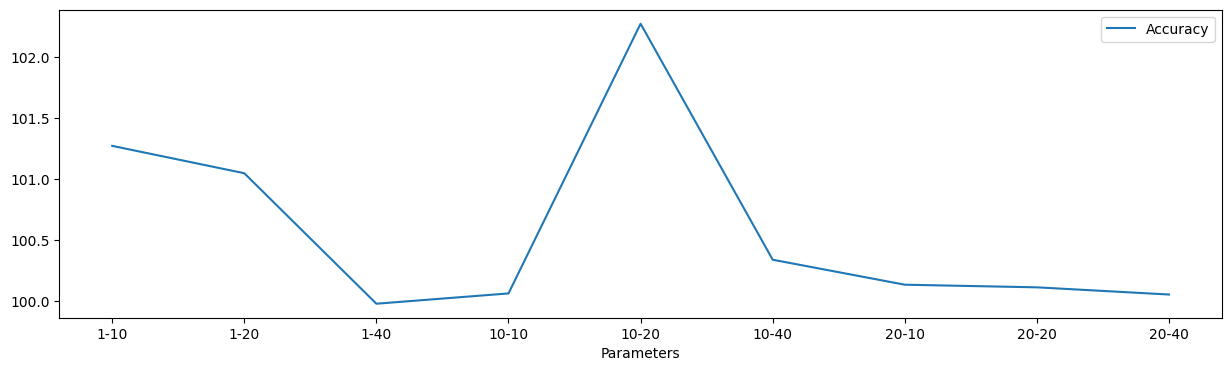

In [11]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [12]:
# Fitting the ANN to the Training set
# 20,40
#model.fit(X, Y ,batch_size = 20, epochs = 40, verbose=0)
# Create ANN Model
model=Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=11, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
          
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(X, Y ,batch_size = 10, epochs = 20, verbose=1)

# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted mass data back to original mass scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test mass data back to original mass scale
y_test_orig=TargetVarScalerFit.inverse_transform(Y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Pair Mass']=y_test_orig
TestingData['PredictedPairMass']=Predictions
TestingData.head()

Epoch 1/20
2500/2500 [==============================] - 1s 272us/step - loss: 0.3140
Epoch 2/20
2500/2500 [==============================] - 1s 267us/step - loss: 0.0979
Epoch 3/20
2500/2500 [==============================] - 1s 268us/step - loss: 0.0608
Epoch 4/20
2500/2500 [==============================] - 1s 267us/step - loss: 0.0431
Epoch 5/20
2500/2500 [==============================] - 1s 308us/step - loss: 0.0323
Epoch 6/20
2500/2500 [==============================] - 1s 277us/step - loss: 0.0257
Epoch 7/20
2500/2500 [==============================] - 1s 272us/step - loss: 0.0203
Epoch 8/20
2500/2500 [==============================] - 1s 271us/step - loss: 0.0168
Epoch 9/20
2500/2500 [==============================] - 1s 270us/step - loss: 0.0142
Epoch 10/20
2500/2500 [==============================] - 1s 270us/step - loss: 0.0122
Epoch 11/20
2500/2500 [==============================] - 1s 270us/step - loss: 0.0108
Epoch 12/20
2500/2500 [==============================] - 1s 269

,Pair Mass,Muon 1 Energy,Muon 2 Energy,Muon 1 pT,Muon 2 pT,Muon 1 Eta,Muon 2 Eta,Muon 1 Phi,Muon 2 Phi,Muon 1 Rapidity,Muon 2 Rapidity,PredictedPairMass
0,9.09624,22.64590,4.98755,22.61070,3.66542,0.055613,-0.825368,-1.166540,-1.57729,0.055613,-0.825087,9.110998
1,18.46730,22.64590,11.28230,22.61070,2.56332,0.055613,2.161880,-1.166540,-2.14436,0.055613,2.161050,18.453421
2,4.38833,13.23310,4.98755,10.80530,3.66542,-0.658341,-0.825368,-0.888959,-1.57729,-0.658314,-0.825087,4.464253
3,20.21160,13.23310,11.28230,10.80530,2.56332,-0.658341,2.161880,-0.888959,-2.14436,-0.658314,2.161050,20.188646
4,12.49080,4.98755,11.28230,3.66542,2.56332,-0.825368,2.161880,-1.577290,-2.14436,-0.825087,2.161050,12.495661


In [14]:
# Evaluating how well our model predicts the pair mass
Difference=100*(TestingData["Pair Mass"]-TestingData["PredictedPairMass"])/np.average(TestingData["Pair Mass"])
print("The average percent difference between the predicted and actual pair mass is: "+str(np.average(Difference))+" %")


The average percent difference between the predicted and actual pair mass is: -0.21440843542712798 %


In [15]:
model.save("/Users/bryandinh/PycharmProjects/comp_phys_2023/Model Training/dataset_2.keras")